In [ ]:
import numpy as np # Calculos cientificos
import pandas as pd # Datos
import matplotlib.pyplot as plt # Graficas

In [ ]:
# Train
path_train = '/content/drive/MyDrive/gea_rapido/cover_train_numerical.csv'
X_train_y = pd.read_csv(path_train) # data frame
X_train_y.head(10) # head() -> 5 primeros elemetos

,dimension-x,dimension-y,dimension-z,weight,length,r_mean,g_mean,b_mean,r_var,g_var,b_var,label
0,176.0,257.0,7.0,236.0,568,167.046644,117.807029,95.143029,7143.867565,5447.659599,5078.191725,1
1,170.0,258.0,15.0,237.0,368,167.365086,117.667798,94.564981,6171.560010,4683.395363,4490.703143,1
2,171.0,260.0,9.0,320.0,163,115.895391,111.319170,106.684883,4800.461459,3243.452027,1987.919432,1
3,165.0,259.0,13.0,227.0,679,154.152054,145.537064,107.919971,5961.120833,5669.512367,6302.419186,1
4,168.0,258.0,9.0,281.0,814,149.932178,162.536013,122.270294,4325.833127,3037.857302,5673.934034,1
5,165.0,257.0,10.0,227.0,114,144.099779,153.428404,142.190000,8922.201977,5017.704509,5995.136054,1
6,204.0,276.0,9.0,494.0,503,97.459983,85.475678,51.339322,4159.139551,2735.302154,2378.574861,1
7,171.0,260.0,6.0,249.0,611,128.469759,112.357790,98.075338,4821.958564,4602.401475,4041.150454,1
8,163.0,257.0,13.0,340.0,275,129.356846,112.380692,82.342808,8232.394584,7333.675304,6191.420752,1
9,149.0,165.0,13.0,218.0,112,140.419044,163.545921,130.429462,3759.043600,2479.779239,1911.452106,1


In [ ]:
y_train = X_train_y['label'] # Extraer los labels train
y_train.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: label, dtype: int64

In [ ]:
# Drop col. label
X_train = X_train_y.drop(columns=['label'])
X_train.head()

,dimension-x,dimension-y,dimension-z,weight,length,r_mean,g_mean,b_mean,r_var,g_var,b_var
0,176.0,257.0,7.0,236.0,568,167.046644,117.807029,95.143029,7143.867565,5447.659599,5078.191725
1,170.0,258.0,15.0,237.0,368,167.365086,117.667798,94.564981,6171.560010,4683.395363,4490.703143
2,171.0,260.0,9.0,320.0,163,115.895391,111.319170,106.684883,4800.461459,3243.452027,1987.919432
3,165.0,259.0,13.0,227.0,679,154.152054,145.537064,107.919971,5961.120833,5669.512367,6302.419186
4,168.0,258.0,9.0,281.0,814,149.932178,162.536013,122.270294,4325.833127,3037.857302,5673.934034


In [ ]:
# TEST:
path_test = '/content/drive/MyDrive/gea_rapido/cover_test_numerical.csv'
X_test_y = pd.read_csv(path_test)
y_test = X_test_y['label']
X_test = X_test_y.drop(columns=['label'])
X_test.head()

,dimension-x,dimension-y,dimension-z,weight,length,r_mean,g_mean,b_mean,r_var,g_var,b_var
0,200.0,200.0,15.24,424.00,416,247.564569,245.039781,226.739931,651.933143,735.180636,684.828008
1,124.0,174.0,12.70,180.00,282,240.028047,240.111522,231.027289,1139.479281,1189.611201,1311.867088
2,129.0,195.0,11.00,178.00,314,179.022137,164.900534,164.540725,6965.390579,8074.442168,7871.175975
3,140.0,216.0,20.32,453.59,158,127.582037,107.388079,143.733678,6070.130741,7134.517918,4926.714816
4,140.0,216.0,20.83,467.20,168,103.291187,139.272741,112.939797,8048.995876,5369.594840,6248.383740


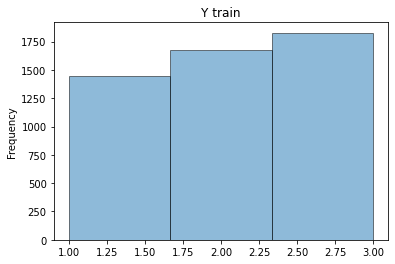

In [ ]:
# Graficar y_train
plt.figure()
ax = y_train.plot.hist(bins=3,
                       figsize=(6,4),
                       alpha=0.5,
                       ec='black') # 1,2,3
ax.set_title('Y train')
plt.show()

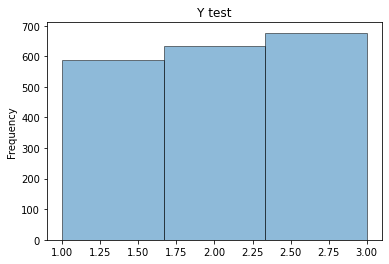

In [ ]:
# Graficar y_test
plt.figure()
ax = y_test.plot.hist(bins=3,
                       figsize=(6,4),
                       alpha=0.5,
                       ec='black')
ax.set_title('Y test')
plt.show()

<Figure size 432x288 with 0 Axes>

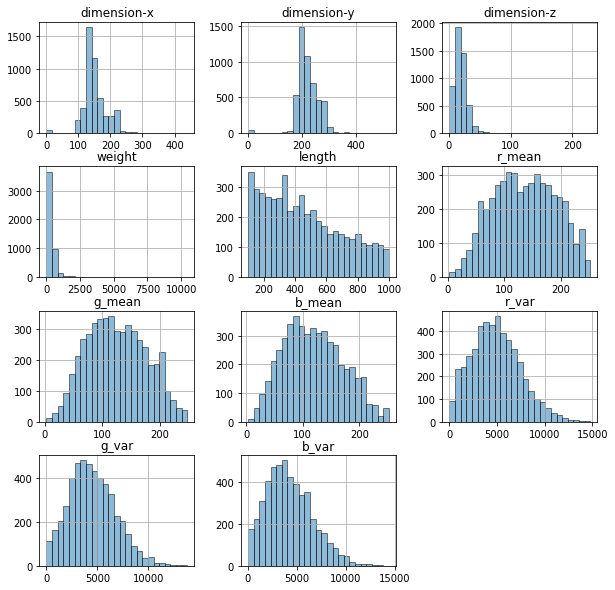

In [ ]:
# Histogramas de caracteristicas (X_train)
plt.figure()
ax = X_train.hist(bins=25,figsize=(10,10),alpha=0.5, ec='black')
plt.show()

In [ ]:
# Clafisicar con LG
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(C = 1, max_iter= 100000) # hiperparametros
clf_lr.fit(X_train, y_train) # Entrenamiento

LogisticRegression(C=1, max_iter=100000)

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf_lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.49      0.37      0.42       589
           2       0.59      0.64      0.62       634
           3       0.78      0.88      0.83       677

    accuracy                           0.64      1900
   macro avg       0.62      0.63      0.62      1900
weighted avg       0.63      0.64      0.63      1900



In [ ]:
from sklearn.model_selection import GridSearchCV
parm = {'C':[0.01, 0.1, 1, 10]}
clf2_lr = LogisticRegression(max_iter=100000)
gs = GridSearchCV(clf2_lr,parm,scoring='f1_weighted')
gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': [0.01, 0.1, 1, 10]}, scoring='f1_weighted')

In [ ]:
print('Mejores parametros:')
print(gs.best_params_)

Mejores parametros:
{'C': 1}


In [ ]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(y_test, y_pred)
print(M)

[[219 244 126]
 [182 408  44]
 [ 43  39 595]]


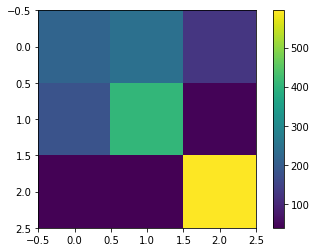

In [ ]:
plt.imshow(M)
plt.colorbar()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf_GB = GradientBoostingClassifier(learning_rate=0.1)
clf_GB.fit(X_train, y_train)
y_pred = clf_GB.predict(X_test)

In [ ]:
M2 = confusion_matrix(y_test, y_pred)
print(M2)

[[457 115  17]
 [ 84 510  40]
 [ 22  47 608]]


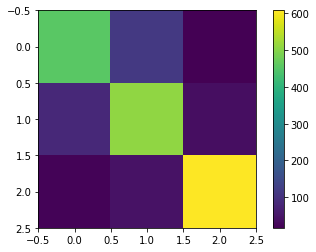

In [ ]:
plt.imshow(M2)
plt.colorbar()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.78      0.79       589
           2       0.76      0.80      0.78       634
           3       0.91      0.90      0.91       677

    accuracy                           0.83      1900
   macro avg       0.83      0.83      0.83      1900
weighted avg       0.83      0.83      0.83      1900



11
[0.43727953 0.28720773 0.10398041 0.03706466 0.01733311 0.01042206
 0.03522293 0.02352494 0.02712591 0.00497838 0.01586034]


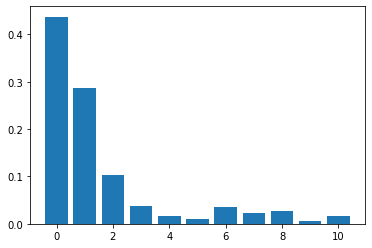

In [ ]:
# Despues del fit.
caract = clf_GB.feature_importances_
print(len(caract))
print(caract)
plt.bar(range(0,11),caract)
plt.show()

In [ ]:
caract = clf_lr.coef_
print(caract)

[[ 2.60582982e-02 -1.88904192e-02 -6.20645008e-02  2.73089613e-03
   1.40700525e-04  2.66288919e-03 -1.37116414e-03 -4.53702095e-04
   6.61667609e-05 -3.02114382e-05  5.59785342e-05]
 [ 1.07822594e-02 -4.21149719e-03 -9.48233984e-02  3.03589170e-03
   3.23726983e-04  8.97673868e-04  2.47580151e-04  4.93990005e-03
  -5.20629327e-05 -5.25350522e-05 -5.66129400e-05]
 [-3.68405576e-02  2.31019164e-02  1.56887899e-01 -5.76678782e-03
  -4.64427507e-04 -3.56056306e-03  1.12358399e-03 -4.48619796e-03
  -1.41038282e-05  8.27464904e-05  6.34405738e-07]]


11
[-3.68405576e-02  2.31019164e-02  1.56887899e-01 -5.76678782e-03
 -4.64427507e-04 -3.56056306e-03  1.12358399e-03 -4.48619796e-03
 -1.41038282e-05  8.27464904e-05  6.34405738e-07]


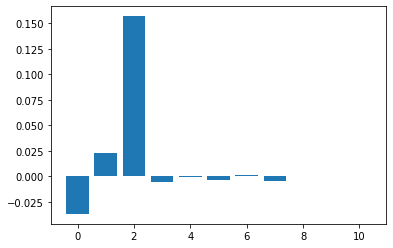

In [ ]:
# Despues del fit.
caract = clf_lr.coef_[2] # 0,1,2
print(len(caract))
print(caract)
plt.bar(range(0,11),caract)
plt.show()

# Clafisicar con TEXTO

In [ ]:
# TRAIN:
path_train = '/content/drive/MyDrive/gea_rapido/cover_train.csv'
X_train_y = pd.read_csv(path_train) #Alt
y_train = X_train_y['label']
X_train = X_train_y.drop(columns=['label'])
X_train.head()

,title,description,dimension-x,dimension-y,dimension-z,weight,length,r_mean,g_mean,b_mean,r_var,g_var,b_var
0,Simpsons Comics Shake-Up,The Simpsons are shaking off the status quo wh...,176.0,257.0,7.0,236.0,568,167.046644,117.807029,95.143029,7143.867565,5447.659599,5078.191725
1,Simpsons Comics: Shake-up,Everyone's favourite dysfunctional family is b...,170.0,258.0,15.0,237.0,368,167.365086,117.667798,94.564981,6171.560010,4683.395363,4490.703143
2,Simpsons Comics Unchained,The Simpson family shelters momentarily-rich c...,171.0,260.0,9.0,320.0,163,115.895391,111.319170,106.684883,4800.461459,3243.452027,1987.919432
3,Bart Simpson Breaks Out,Escape brain-numbing boredom with Bart Simpson...,165.0,259.0,13.0,227.0,679,154.152054,145.537064,107.919971,5961.120833,5669.512367,6302.419186
4,Simpsons Comics Dollars to Donuts,It's dollars to donuts you'll love the newest ...,168.0,258.0,9.0,281.0,814,149.932178,162.536013,122.270294,4325.833127,3037.857302,5673.934034


In [ ]:
# TEST:
path_test = '/content/drive/MyDrive/gea_rapido/cover_test.csv'
X_test_y = pd.read_csv(path_test)
y_test = X_test_y['label']
X_test = X_test_y.drop(columns=['label'])
X_test.head()

,title,description,dimension-x,dimension-y,dimension-z,weight,length,r_mean,g_mean,b_mean,r_var,g_var,b_var
0,There is Another Way : The second big book of ...,We are living at a time when loud voices from ...,200.0,200.0,15.24,424.00,416,247.564569,245.039781,226.739931,651.933143,735.180636,684.828008
1,The Little Book of Bereavement for Schools,Be inspired by their courage. Be brave and mak...,124.0,174.0,12.70,180.00,282,240.028047,240.111522,231.027289,1139.479281,1189.611201,1311.867088
2,Teach Like Your Hair's on Fire : The Methods a...,This New York Times bestseller gives any teach...,129.0,195.0,11.00,178.00,314,179.022137,164.900534,164.540725,6965.390579,8074.442168,7871.175975
3,The Iron Khan,A supernatural mystery set in Singapore featur...,140.0,216.0,20.32,453.59,158,127.582037,107.388079,143.733678,6070.130741,7134.517918,4926.714816
4,Precious Dragon,The spell-casting detective and his demonic pa...,140.0,216.0,20.83,467.20,168,103.291187,139.272741,112.939797,8048.995876,5369.594840,6248.383740


In [ ]:
X_train['T + D'] = X_train['title'] + ' ' + X_train['description']
X_train = X_train.drop(columns=['title','description'])
X_train.head()

X_test['T + D'] = X_test['title'] + ' ' + X_test['description']
X_test = X_test.drop(columns=['title','description'])
X_test.head()

,dimension-x,dimension-y,dimension-z,weight,length,r_mean,g_mean,b_mean,r_var,g_var,b_var,T + D
0,200.0,200.0,15.24,424.00,416,247.564569,245.039781,226.739931,651.933143,735.180636,684.828008,There is Another Way : The second big book of ...
1,124.0,174.0,12.70,180.00,282,240.028047,240.111522,231.027289,1139.479281,1189.611201,1311.867088,The Little Book of Bereavement for Schools Be ...
2,129.0,195.0,11.00,178.00,314,179.022137,164.900534,164.540725,6965.390579,8074.442168,7871.175975,Teach Like Your Hair's on Fire : The Methods a...
3,140.0,216.0,20.32,453.59,158,127.582037,107.388079,143.733678,6070.130741,7134.517918,4926.714816,The Iron Khan A supernatural mystery set in Si...
4,140.0,216.0,20.83,467.20,168,103.291187,139.272741,112.939797,8048.995876,5369.594840,6248.383740,Precious Dragon The spell-casting detective an...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()

vectorizer.fit(list(X_train["T + D"]) + list(X_test["T + D"]))
X_test_TF = vectorizer.transform(X_test["T + D"])
X_train_TF = vectorizer.transform(X_train["T + D"])